In [0]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm, animation, rc
import matplotlib.colors
from IPython.display import HTML
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [0]:
class SN:
  def __init__(self, w_init, b_init, algo):
    self.w = w_init
    self.b = b_init
    self.algo = algo
    self.w_h = []
    self.b_h = []
    self.e_h = []
  
  def sigmoid(self, x, w = None, b = None):
    if w == None:
      w = self.w
    if b == None:
      b = self.b
    return 1. / (1. + np.exp(-(w * x + b)))
  
  def error(self, X, Y, w = None, b = None):
    error = 0
    if w == None:
      w = self.w
    if b == None:
      b = self.b
    for x, y in zip(X, Y):
      error += 0.5 * (self.sigmoid(x, w, b) - y) ** 2
    return error
  
  def grad_w(self, x, y, w = None, b = None):
    if w == None:
      w = self.w
    if b == None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * (1 - y_pred) * y_pred * x
  
  def grad_b(self, x, y, w = None, b = None):
    if w == None:
      w = self.w
    if b == None:
      b = self.b
    y_pred = self.sigmoid(x, w, b)
    return (y_pred - y) * (1 - y_pred) * y_pred

  def fit(self, X, Y, epochs = 100, eta = 0.1, beta = 0.7, beta1 = 0.6, beta2 = 0.5, gama = 0.3, eps = 1e-8, mini_batch_size = 10):
    self.X = X
    self.Y = Y
    self.w_h = []
    self.b_h = []
    self.e_h = []


    if self.algo == 'Grad':
      for i in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        m = X.shape[0]
        self.w -= eta * dw / m
        self.b -= eta * db / m
        self.append_log()
      
    if self.algo == 'MiniBatch':
      for i in range(epochs):
        dw, db = 0, 0
        points_seen = 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
          points_seen += 1
        if points_seen % mini_batch_size == 0:
          self.w -= eta * dw / mini_batch_size
          self.b -= eta * db / mini_batch_size
          self.append_log()
          dw, db = 0, 0
          
    if self.algo == 'Momentum':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db = 0, 0
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y)
          db += self.grad_b(x, y)
        v_w = gama * v_w + eta * dw
        v_b = gama * v_b + eta * db
        self.w -= v_w
        self.b -= v_b
        self.append_log()
  
    if self.algo == 'NAG':
      v_w, v_b = 0, 0
      for i in range(epochs):
        dw, db = 0, 0
        v_w = gama * v_w
        v_b = gama * v_b
        for x,y in zip(X, Y):
          dw += self.grad_w(x, y, self.w - self.v_w, self.b - self.v_b)
          db += self.grad_b(x, y, self.w - self.v_w, self.b - self.v_b)
        v_w += eta * dw
        v_b += eta * db
        self.w -= v_w
        self.b -= v_b
        self.append_log()
  
  
  def predict(self, X, w = None, b = None):
    Y_pred = []
    if w == None:
      w = self.w
    if b == None:
      b = self.b
    for x in X:
      res = self.sigmoid(x, w, b)
      Y_pred.append(res)
    return np.array(Y_pred)
  
  def append_log(self):
    self.w_h.append(self.w)
    self.b_h.append(self.b)
    self.e_h.append(self.error(self.X, self.Y))

In [0]:
data, labels = make_moons(n_samples=100, random_state=0, noise = 0.2)

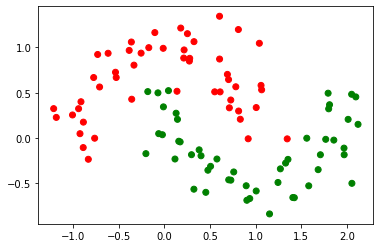

In [8]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red", "yellow", "green"])
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = my_cmap)
plt.show()

In [0]:
X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify = labels, random_state = 0)

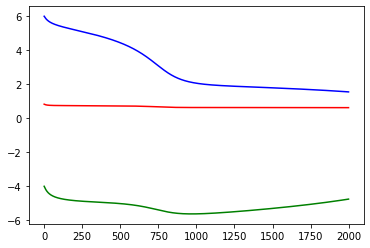

In [27]:
sn = SN(w_init=-4, b_init= 6, algo="Momentum")
sn.fit(X, Y, epochs = 2000)
plt.plot(sn.e_h, 'r')
plt.plot(sn.w_h, 'g')
plt.plot(sn.b_h, 'b')
plt.show()

In [0]:
X = np.asarray([3.5, 0.35, 3.2, -2.0, 1.5, -0.5])
Y = np.asarray([0.5, 0.50, 0.5,  0.5, 0.1,  0.3])